<a href="https://colab.research.google.com/github/fidelaazifah/classification-nutrition-status/blob/main/File_Program_TA_1301213195_Fidela_Azifah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Data**

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# **Preprocessing**

Mengumpulkan Data dan mengubahnya menjadi DataFrame

In [48]:
# Membaca data dari URL
url = 'https://raw.githubusercontent.com/fidelaazifah/classification-nutrition-status/refs/heads/main/Data.csv'
data = pd.read_csv(url)

# Menampilkan beberapa baris pertama untuk mengecek struktur data
data.head()

,No,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,...,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA,Detail
0,1,3314010911170002,NAUFAL ARFAN PRADYASTA,L,2019-11-09,2.8,0.0,TRI PAMONO,JAWA TENGAH,KAB SRAGEN,...,Normal,0.89,Normal,-0.85,N,-,NaN,-,-,
1,2,3314101709198620,ALFARO AFHAM SYAHRUR,L,2019-09-17,2.9,49.0,SELI PUSPITASARI-YOVI HASTO P,JAWA TENGAH,KAB SRAGEN,...,Normal,-0.62,Normal,0.2,O,-,NaN,-,-,
2,3,3314016310190001,ALFIA KHOIRUN NISA,P,2019-10-23,3.0,0.0,SUSI RAHAYU-KRESNO KUNCORO,JAWA TENGAH,KAB SRAGEN,...,Normal,-1.19,Normal,-0.58,N,-,NaN,-,-,
3,4,3314014909190001,ANANDA NATASYA MEDINA PUTRI,P,2019-09-09,3.4,0.0,LISTANTO-SILVI AMALIA,JAWA TENGAH,KAB SRAGEN,...,Normal,-1.44,Normal,0.74,N,-,NaN,-,-,
4,5,3314011309190001,MUH MAULANA,L,2019-09-13,3.0,48.0,MARDIANTO,JAWA TENGAH,KAB SRAGEN,...,Normal,-0.35,Gizi Kurang,-2.86,T,-,NaN,-,-,


In [49]:
# Menampilkan List Data dalam Dataset
data_columns = data.columns.to_list()
data_columns

['No',
 'NIK',
 'Nama',
 'JK',
 'Tgl Lahir',
 'BB Lahir',
 'TB Lahir',
 'Nama Ortu',
 'Prov',
 'Kab/Kota',
 'Kec',
 'Pukesmas',
 'Desa/Kel',
 'Posyandu',
 'RT',
 'RW',
 'Alamat',
 'Usia Saat Ukur',
 'Tanggal Pengukuran',
 'Berat',
 'Tinggi',
 'Cara Ukur',
 'LiLA',
 'BB/U',
 'ZS BB/U',
 'TB/U',
 'ZS TB/U',
 'BB/TB',
 'ZS BB/TB',
 'Naik Berat Badan',
 'PMT Diterima (kg)',
 'Jml Vit A',
 'KPSP',
 'KIA',
 'Detail']

In [50]:
# Menampilkan ringkasan informasi dataset setelah penghapusan kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No                  3129 non-null   int64  
 1   NIK                 3129 non-null   int64  
 2   Nama                3129 non-null   object 
 3   JK                  3129 non-null   object 
 4   Tgl Lahir           3129 non-null   object 
 5   BB Lahir            3129 non-null   float64
 6   TB Lahir            3012 non-null   float64
 7   Nama Ortu           3127 non-null   object 
 8   Prov                3129 non-null   object 
 9   Kab/Kota            3129 non-null   object 
 10  Kec                 3129 non-null   object 
 11  Pukesmas            3129 non-null   object 
 12  Desa/Kel            3129 non-null   object 
 13  Posyandu            3125 non-null   object 
 14  RT                  2757 non-null   object 
 15  RW                  1591 non-null   object 
 16  Alamat

# **EDA (Exploratory Data Analysis)**

## Data Cleaning

- Drop kolom yang tidak perlu

In [51]:
fixed_data = data.copy()
fixed_data.drop(columns=['No', 'NIK', 'Nama', 'Nama Ortu', 'Prov', 'Kab/Kota', 'Kec', 'Pukesmas', 'Desa/Kel',
                         'Posyandu', 'RT', 'RW', 'Alamat', 'Cara Ukur', 'ZS BB/U', 'ZS TB/U', 'ZS BB/TB',
                         'PMT Diterima (kg)', 'Jml Vit A', 'KPSP', 'KIA', 'Detail', 'Naik Berat Badan'],
                         inplace=True)

fixed_data.head()

,JK,Tgl Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Tanggal Pengukuran,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
0,L,2019-11-09,2.8,0.0,4 Tahun - 10 Bulan - 4 Hari,2024-09-13,18.2,113,NaN,Berat Badan Normal,Normal,Normal
1,L,2019-09-17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,2024-09-10,17.8,107,19.0,Berat Badan Normal,Normal,Normal
2,P,2019-10-23,3.0,0.0,4 Tahun - 10 Bulan - 12 Hari,2024-09-04,15.3,103,0.0,Berat Badan Normal,Normal,Normal
3,P,2019-09-09,3.4,0.0,4 Tahun - 11 Bulan - 26 Hari,2024-09-04,17.1,102.5,0.0,Berat Badan Normal,Normal,Normal
4,L,2019-09-13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,2024-09-03,14.1,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang


- Mengonversi nilai kolom menjadi numerik

In [52]:
columns = ['BB Lahir', 'TB Lahir', 'Berat', 'Tinggi', 'LiLA']
fixed_data[columns] = fixed_data[columns].apply(pd.to_numeric, errors="coerce")

# Date Time Columns
date_columns = ['Tgl Lahir', 'Tanggal Pengukuran']
fixed_data[date_columns] = fixed_data[date_columns].apply(pd.to_datetime, errors="coerce")

fixed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   JK                  3129 non-null   object        
 1   Tgl Lahir           3129 non-null   datetime64[ns]
 2   BB Lahir            3129 non-null   float64       
 3   TB Lahir            3012 non-null   float64       
 4   Usia Saat Ukur      3129 non-null   object        
 5   Tanggal Pengukuran  3129 non-null   datetime64[ns]
 6   Berat               3129 non-null   float64       
 7   Tinggi              3128 non-null   float64       
 8   LiLA                2746 non-null   float64       
 9   BB/U                3129 non-null   object        
 10  TB/U                3129 non-null   object        
 11  BB/TB               3129 non-null   object        
dtypes: datetime64[ns](2), float64(5), object(5)
memory usage: 293.5+ KB


- Menemukan dan mengganti data NaN/Null dengan median

In [53]:
# List Column that have a Null/NaN Value
fixed_data.isna().sum()

,0
JK,0
Tgl Lahir,0
BB Lahir,0
TB Lahir,117
Usia Saat Ukur,0
Tanggal Pengukuran,0
Berat,0
Tinggi,1
LiLA,383
BB/U,0


In [54]:
# Replace Null/NaN value with median
null_columns = fixed_data.columns[fixed_data.isna().any()]
fixed_data[null_columns] = fixed_data[null_columns].apply(lambda col: col.fillna(col.median()))
fixed_data.isna().sum()

,0
JK,0
Tgl Lahir,0
BB Lahir,0
TB Lahir,0
Usia Saat Ukur,0
Tanggal Pengukuran,0
Berat,0
Tinggi,0
LiLA,0
BB/U,0


- Memeriksa apakah ada nilai nol pada kolom numerik

In [55]:
print((fixed_data == 0).sum())

JK                       0
Tgl Lahir                0
BB Lahir                39
TB Lahir               276
Usia Saat Ukur           0
Tanggal Pengukuran       0
Berat                    0
Tinggi                   0
LiLA                  1104
BB/U                     0
TB/U                     0
BB/TB                    0
dtype: int64


- Melakukan masking pada semua nilai 0 di setiap kolom dengan median

In [56]:
columns_w_zero = fixed_data.select_dtypes(include=['number']).columns[(fixed_data.select_dtypes(include=['number']) == 0).any()].tolist()
fixed_data[columns_w_zero] = fixed_data[columns_w_zero].apply(lambda col: col.mask(col == 0, col.median()))
print((fixed_data == 0).sum())

JK                    0
Tgl Lahir             0
BB Lahir              0
TB Lahir              0
Usia Saat Ukur        0
Tanggal Pengukuran    0
Berat                 0
Tinggi                0
LiLA                  0
BB/U                  0
TB/U                  0
BB/TB                 0
dtype: int64


- Menemukan dan menghapus nilai duplikat

In [57]:
total_dup = fixed_data.duplicated().sum()
print(f"Total Duplikat data {total_dup}")

Total Duplikat data 417


In [58]:
fixed_data.drop_duplicates(inplace=True)
print(f"Total Duplikat data {fixed_data.duplicated().sum()}")

Total Duplikat data 0


## Data Formatting

- Split Tanggal Lahir and Tanggal Pengukuran

In [59]:
"""
Tanggal Lahir old Format = "dd-mm-yyy"
We Will split them into 3 columns that
describe each of DateTime format such as
"birth_of_year", "month_of_birth", "Day_of_birth"
"""
tanggal_lahir = fixed_data[["Tgl Lahir"]]
tahun_lahir = tanggal_lahir["Tgl Lahir"].dt.year.rename("Tahun Lahir")
bulan_lahir = tanggal_lahir["Tgl Lahir"].dt.month.rename("Bulan Lahir")
hari_lahir = tanggal_lahir["Tgl Lahir"].dt.day.rename("Hari Lahir")

list_columns = [tahun_lahir, bulan_lahir, hari_lahir]

for column in reversed(list_columns):
    idx = 2
    fixed_data.insert(idx, column.name, column)
    idx += 1

fixed_data.head()

,JK,Tgl Lahir,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Tanggal Pengukuran,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
0,L,2019-11-09,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,2024-09-13,18.2,113.0,14.0,Berat Badan Normal,Normal,Normal
1,L,2019-09-17,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,2024-09-10,17.8,107.0,19.0,Berat Badan Normal,Normal,Normal
2,P,2019-10-23,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,2024-09-04,15.3,103.0,14.0,Berat Badan Normal,Normal,Normal
3,P,2019-09-09,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,2024-09-04,17.1,102.5,14.0,Berat Badan Normal,Normal,Normal
4,L,2019-09-13,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,2024-09-03,14.1,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang


In [60]:
# Same as above but for Tanggal Pengukuran
tanggal_ukur = fixed_data[["Tanggal Pengukuran"]]
tahun_ukur = tanggal_ukur["Tanggal Pengukuran"].dt.year.rename("Tahun Pengukuran")
bulan_ukur = tanggal_ukur["Tanggal Pengukuran"].dt.month.rename("Bulan Pengukuran")
hari_ukur = tanggal_ukur["Tanggal Pengukuran"].dt.day.rename("Hari Pengukuran")

columns = [tahun_ukur, bulan_ukur, hari_ukur]

for column in columns:
    if column.name not in fixed_data.columns:
        list_column = [column for column in fixed_data.columns]
        idx_start = list_column.index("Tanggal Pengukuran")
        fixed_data.insert(idx_start, column.name, column)
        idx_start += 1

fixed_data.head()

,JK,Tgl Lahir,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Tahun Pengukuran,Bulan Pengukuran,Hari Pengukuran,Tanggal Pengukuran,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
0,L,2019-11-09,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,2024,9,13,2024-09-13,18.2,113.0,14.0,Berat Badan Normal,Normal,Normal
1,L,2019-09-17,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,2024,9,10,2024-09-10,17.8,107.0,19.0,Berat Badan Normal,Normal,Normal
2,P,2019-10-23,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,2024,9,4,2024-09-04,15.3,103.0,14.0,Berat Badan Normal,Normal,Normal
3,P,2019-09-09,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,2024,9,4,2024-09-04,17.1,102.5,14.0,Berat Badan Normal,Normal,Normal
4,L,2019-09-13,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,2024,9,3,2024-09-03,14.1,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang


In [61]:
# Drop Tgl Lahir and Tanggal Pengukuran Column
fixed_data.drop(columns=["Tgl Lahir", "Tanggal Pengukuran"], inplace=True)
fixed_data.head()

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Tahun Pengukuran,Bulan Pengukuran,Hari Pengukuran,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
0,L,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,2024,9,13,18.2,113.0,14.0,Berat Badan Normal,Normal,Normal
1,L,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,2024,9,10,17.8,107.0,19.0,Berat Badan Normal,Normal,Normal
2,P,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,2024,9,4,15.3,103.0,14.0,Berat Badan Normal,Normal,Normal
3,P,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,2024,9,4,17.1,102.5,14.0,Berat Badan Normal,Normal,Normal
4,L,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,2024,9,3,14.1,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang


In [62]:
# Drop Abnormal Values in Each Column
# Detect all abnormal data with max values
fixed_data.max()
# BB Lahir = 4200.00 as abnormal since no human babies in this world born in 4.200Kg Weight LoL
# TB Lahir = 106 as Abnormal since no human babies in this world born and got 106Cm Height LMFAOOOO
# Drop the Max BB Lahir and TB lahir Value

# fixed_data.drop(fixed_data.loc[[fixed_data["BB Lahir"].idxmax()]], inplace=True)
# fixed_data.drop(fixed_data.loc[[fixed_data["TB Lahir"].idxmax()]], inplace=True)
fixed_data[["BB Lahir"]].max()

,0
BB Lahir,4200.0


## Data Visualisation to Understanding Data

In [63]:
fixed_data.head()

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Tahun Pengukuran,Bulan Pengukuran,Hari Pengukuran,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
0,L,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,2024,9,13,18.2,113.0,14.0,Berat Badan Normal,Normal,Normal
1,L,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,2024,9,10,17.8,107.0,19.0,Berat Badan Normal,Normal,Normal
2,P,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,2024,9,4,15.3,103.0,14.0,Berat Badan Normal,Normal,Normal
3,P,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,2024,9,4,17.1,102.5,14.0,Berat Badan Normal,Normal,Normal
4,L,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,2024,9,3,14.1,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang


In [64]:
fixed_data.describe()

,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Tahun Pengukuran,Bulan Pengukuran,Hari Pengukuran,Berat,Tinggi,LiLA
count,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.0,2712.0,2712.000000,2712.000000,2712.000000,2712.000000
mean,2021.558997,6.526917,15.660767,93.043626,48.480085,2024.0,9.0,8.286136,11.502588,86.115450,15.069156
std,1.419753,3.419951,8.745677,511.809737,4.889067,0.0,0.0,4.016379,3.233732,12.846617,4.160122
min,2019.000000,1.000000,1.000000,0.350000,0.490000,2024.0,9.0,1.000000,2.000000,43.000000,1.000000
25%,2020.000000,4.000000,8.000000,3.000000,48.000000,2024.0,9.0,5.000000,9.300000,77.000000,14.000000
50%,2021.000000,6.000000,16.000000,3.000000,49.000000,2024.0,9.0,8.500000,11.600000,88.000000,14.000000
75%,2023.000000,10.000000,23.000000,3.300000,49.000000,2024.0,9.0,11.000000,13.700000,96.000000,15.500000
max,2024.000000,12.000000,31.000000,4200.000000,106.000000,2024.0,9.0,23.000000,62.000000,115.000000,155.000000


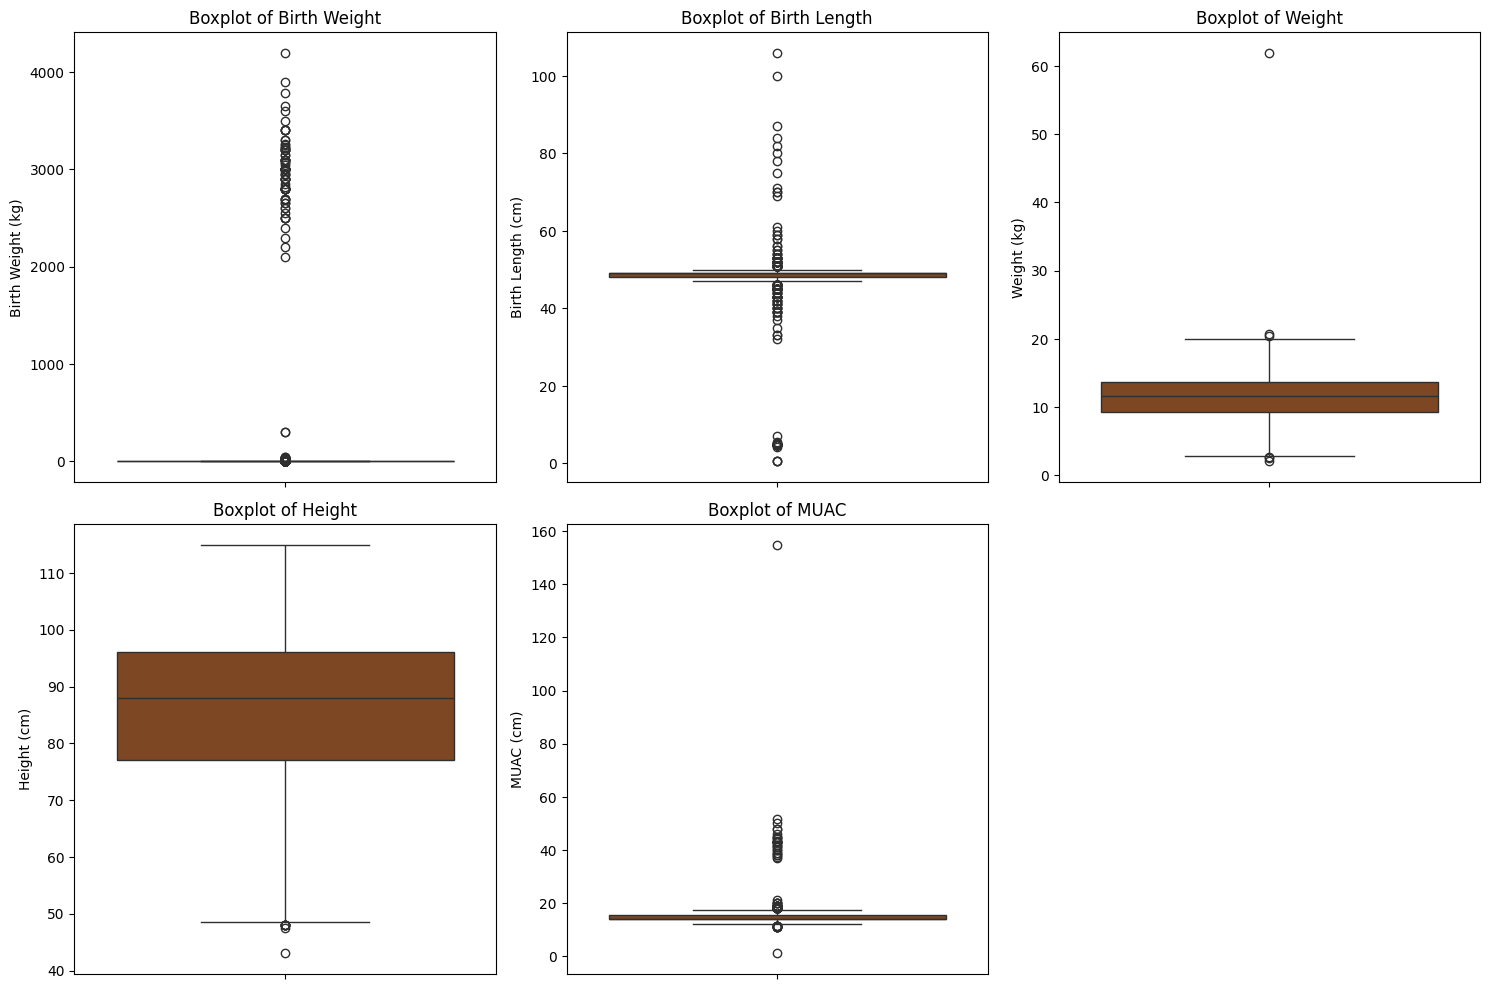

In [65]:
#Histogram

# Warna berbeda untuk setiap kategori
brown = "#8B4513"

# Membuat subplots dengan 2 baris dan 3 kolom
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Boxplot for Birth Weight
sns.boxplot(y=fixed_data["BB Lahir"], ax=axs[0,0], color=brown)
axs[0,0].set_title("Boxplot of Birth Weight")
axs[0,0].set_ylabel("Birth Weight (kg)")

# Boxplot for Birth Length
sns.boxplot(y=fixed_data["TB Lahir"], ax=axs[0,1], color=brown)
axs[0,1].set_title("Boxplot of Birth Length")
axs[0,1].set_ylabel("Birth Length (cm)")

# Boxplot for Weight
sns.boxplot(y=fixed_data["Berat"], ax=axs[0,2], color=brown)
axs[0,2].set_title("Boxplot of Weight")
axs[0,2].set_ylabel("Weight (kg)")

# Boxplot for Height
sns.boxplot(y=fixed_data["Tinggi"], ax=axs[1,0], color=brown)
axs[1,0].set_title("Boxplot of Height")
axs[1,0].set_ylabel("Height (cm)")

# Boxplot for MUAC (Mid-Upper Arm Circumference)
sns.boxplot(y=fixed_data["LiLA"], ax=axs[1,1], color=brown)
axs[1,1].set_title("Boxplot of MUAC")
axs[1,1].set_ylabel("MUAC (cm)")

# Menghapus subplot kosong (1,2)
fig.delaxes(axs[1,2])

# Menyesuaikan tata letak
plt.tight_layout()

# Menyimpan gambar sebagai PNG
plt.savefig("boxplot_outlier.png", dpi=300)

# Menampilkan plot
plt.show()

- Berdasarkan Histogram dan Boxplot. data tersebut berpotensi memiliki banyak pencilan.
- Jadi berdasarkan informasi tersebut, kita akan mengidentifikasi dan menghitung total outlier di setiap kolom

In [66]:
# BB lahir Column
Q1 = fixed_data["BB Lahir"].quantile(0.25)
Q2 = fixed_data["BB Lahir"].median()
Q3 = fixed_data["BB Lahir"].quantile(0.75)

IQR = Q3 - Q1 # Difference between Quantile 1 and 3

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#liat output

lower_bound, upper_bound

fixed_data.loc[((fixed_data["BB Lahir"] < lower_bound) | (fixed_data["BB Lahir"] > upper_bound))]

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Tahun Pengukuran,Bulan Pengukuran,Hari Pengukuran,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
36,P,2019,10,18,3000.0,49.0,4 Tahun - 10 Bulan - 26 Hari,2024,9,13,19.0,110.0,18.0,Berat Badan Normal,Normal,Normal
37,L,2019,10,3,3000.0,49.0,4 Tahun - 11 Bulan - 10 Hari,2024,9,12,16.8,105.0,17.0,Berat Badan Normal,Normal,Normal
55,P,2020,7,17,3100.0,49.0,4 Tahun - 1 Bulan - 21 Hari,2024,9,7,17.5,106.5,17.0,Berat Badan Normal,Normal,Normal
60,L,2020,3,31,3.9,51.0,4 Tahun - 5 Bulan - 9 Hari,2024,9,9,15.8,105.2,16.0,Berat Badan Normal,Normal,Normal
70,P,2020,7,1,2.5,47.0,4 Tahun - 2 Bulan - 7 Hari,2024,9,7,15.7,102.8,17.5,Berat Badan Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,L,2020,2,27,9.3,80.0,4 Tahun - 6 Bulan - 10 Hari,2024,9,7,12.6,99.0,14.0,Kurang,Normal,Gizi Kurang
3044,P,2021,2,26,2.0,45.0,3 Tahun - 6 Bulan - 9 Hari,2024,9,6,11.4,94.5,14.5,Kurang,Normal,Gizi Kurang
3049,P,2021,12,6,29.0,45.0,2 Tahun - 8 Bulan - 28 Hari,2024,9,3,9.6,86.0,14.0,Kurang,Normal,Gizi Kurang
3089,P,2023,6,5,2.5,47.0,1 Tahun - 3 Bulan - 10 Hari,2024,9,14,7.0,72.0,15.0,Kurang,Normal,Gizi Kurang


In [67]:
np.median(fixed_data["BB Lahir"])

np.float64(3.0)

In [68]:
data_clean = fixed_data.copy()
data_clean.head()
# since the mean in BB Lahir is 93 (wich is way more out of the upper bound) instead we will use median


# Before masking median = 3.0
data_clean["BB Lahir"] = data_clean["BB Lahir"].mask((data_clean["BB Lahir"] < lower_bound) | (data_clean["BB Lahir"] > upper_bound), data_clean["BB Lahir"].median())
data_clean.loc[((data_clean["BB Lahir"] < lower_bound) | (data_clean["BB Lahir"] > upper_bound))].count() # Well way more generate but it's okay :D


,0
JK,0
Tahun Lahir,0
Bulan Lahir,0
Hari Lahir,0
BB Lahir,0
TB Lahir,0
Usia Saat Ukur,0
Tahun Pengukuran,0
Bulan Pengukuran,0
Hari Pengukuran,0


In [69]:
# Format the Usia Saat Ukur column

def format_usia(usia = list|dict|str):
    usia_format = usia.split(' - ')
    tahun_lahir = int(usia_format[0].split()[0])
    bulan_lahir = int(usia_format[1].split()[0])
    hari_lahir = int(usia_format[2].split()[0])
    total_bulan = tahun_lahir * 12 + bulan_lahir + hari_lahir / 30
    return round(total_bulan, 1)


data_clean.insert(7, "Usia dalam bulan", data_clean["Usia Saat Ukur"].apply(format_usia))
data_clean.head()

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Usia dalam bulan,Tahun Pengukuran,Bulan Pengukuran,Hari Pengukuran,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
0,L,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,58.1,2024,9,13,18.2,113.0,14.0,Berat Badan Normal,Normal,Normal
1,L,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,59.8,2024,9,10,17.8,107.0,19.0,Berat Badan Normal,Normal,Normal
2,P,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,58.4,2024,9,4,15.3,103.0,14.0,Berat Badan Normal,Normal,Normal
3,P,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,59.9,2024,9,4,17.1,102.5,14.0,Berat Badan Normal,Normal,Normal
4,L,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,59.7,2024,9,3,14.1,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang


In [70]:
# TB Lahir Column
TB_Q1 = data_clean["TB Lahir"].quantile(0.25)
TB_Q2 = data_clean["TB Lahir"].median()
TB_Q3 = data_clean["TB Lahir"].quantile(0.75)

IQR = TB_Q3 - TB_Q1

lower_bound = TB_Q1 - 1.5 * IQR
upper_bound = TB_Q3 + 1.5 * IQR

lower_bound, upper_bound # Seems like normal, let's check what's the extreme outliers

# Masking the outliers value with mean, since mean value seem normal :D
data_clean["TB Lahir"] = data_clean["TB Lahir"].mask((data_clean["TB Lahir"] < lower_bound) | (data_clean["TB Lahir"] > upper_bound), data_clean["TB Lahir"].mean())


data_clean["TB Lahir"].loc[((data_clean["TB Lahir"] < lower_bound) | (data_clean["TB Lahir"] > upper_bound))]


,TB Lahir


In [71]:
# LiLA Column
LiLA_Q1 = data_clean["LiLA"].quantile(0.25)
LiLA_Q2 = data_clean["LiLA"].median()
LiLA_Q3 = data_clean["LiLA"].quantile(0.75)

IQR_LiLA = LiLA_Q3 - LiLA_Q1

lower_bound_LiLA = LiLA_Q1 - 1.5 * IQR_LiLA
upper_bound_LiLA = LiLA_Q3 + 1.5 * IQR_LiLA

lower_bound_LiLA, upper_bound_LiLA

# Mengganti nilai outlier dengan rata-rata
data_clean["LiLA"] = data_clean["LiLA"].mask(
    (data_clean["LiLA"] < lower_bound_LiLA) | (data_clean["LiLA"] > upper_bound_LiLA),
    data_clean["LiLA"].mean()
)

# Menampilkan data yang sebelumnya terdeteksi sebagai outlier
data_clean["LiLA"].loc[
    ((data_clean["LiLA"] < lower_bound_LiLA) | (data_clean["LiLA"] > upper_bound_LiLA))
]


,LiLA


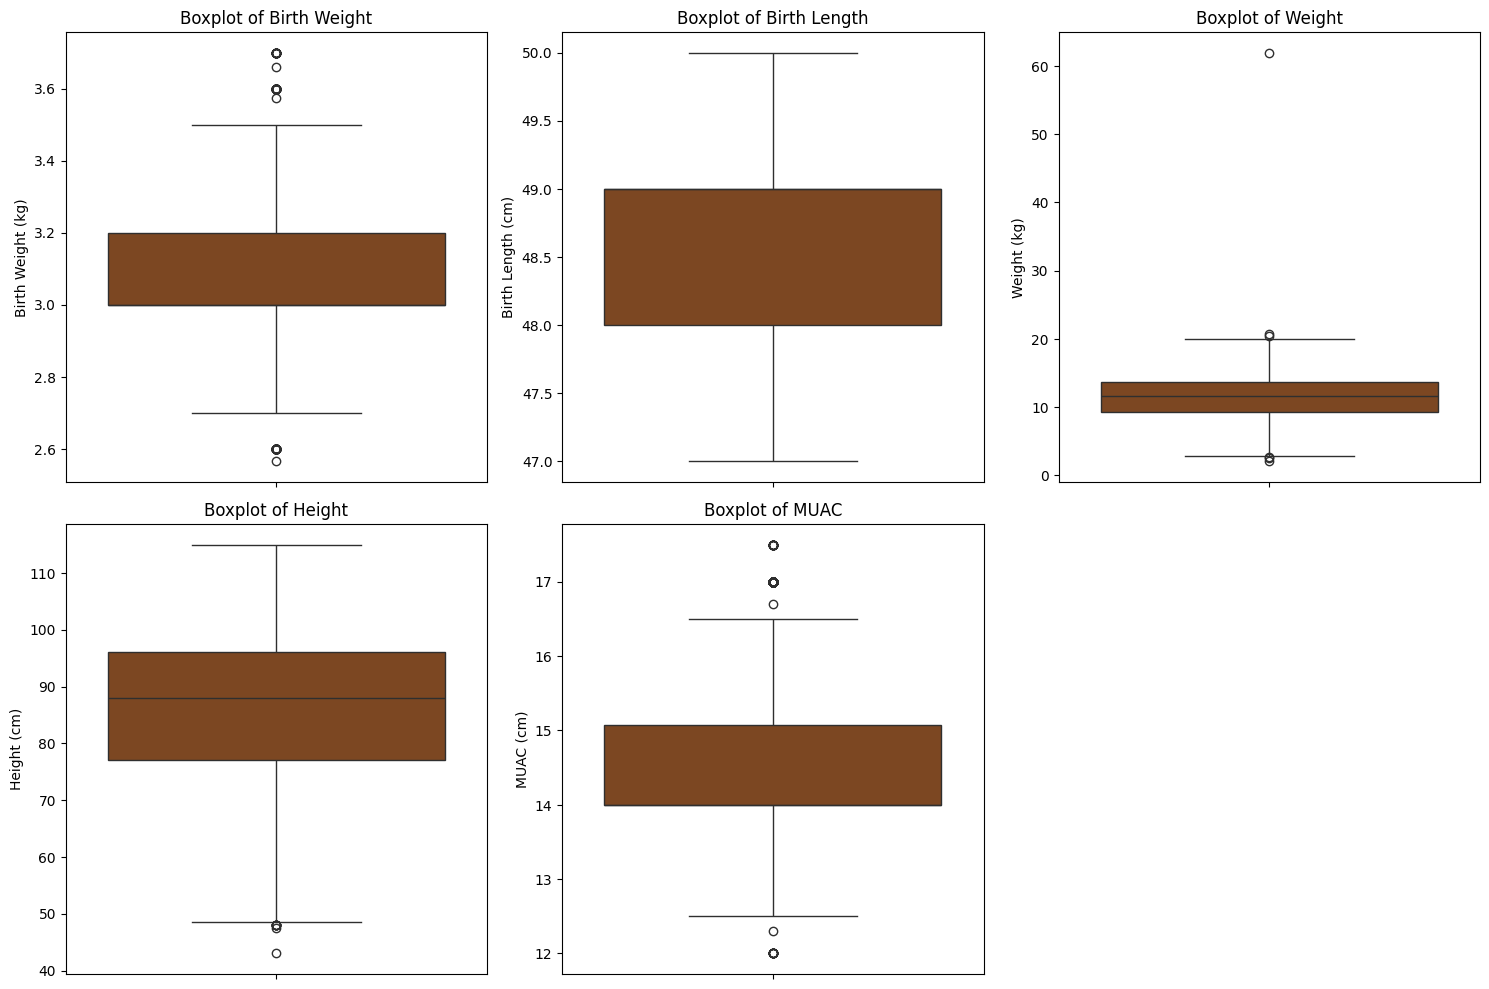

In [72]:
# Warna yang digunakan
dark_brown = "#8B4513"

# Membuat subplots dengan 2 baris dan 3 kolom
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Boxplot for Birth Weight
sns.boxplot(y=data_clean["BB Lahir"], ax=axs[0,0], color=dark_brown)
axs[0,0].set_title("Boxplot of Birth Weight")
axs[0,0].set_ylabel("Birth Weight (kg)")

# Boxplot for Birth Length
sns.boxplot(y=data_clean["TB Lahir"], ax=axs[0,1], color=dark_brown)
axs[0,1].set_title("Boxplot of Birth Length")
axs[0,1].set_ylabel("Birth Length (cm)")

# Boxplot for Weight
sns.boxplot(y=data_clean["Berat"], ax=axs[0,2], color=dark_brown)
axs[0,2].set_title("Boxplot of Weight")
axs[0,2].set_ylabel("Weight (kg)")

# Boxplot for Height
sns.boxplot(y=data_clean["Tinggi"], ax=axs[1,0], color=dark_brown)
axs[1,0].set_title("Boxplot of Height")
axs[1,0].set_ylabel("Height (cm)")

# Boxplot for MUAC (Mid-Upper Arm Circumference)
sns.boxplot(y=data_clean["LiLA"], ax=axs[1,1], color=dark_brown)
axs[1,1].set_title("Boxplot of MUAC")
axs[1,1].set_ylabel("MUAC (cm)")

# Removing the empty subplot (1,2)
fig.delaxes(axs[1,2])

# Adjust layout
plt.tight_layout()

# Save the figure as PNG
plt.savefig("boxplot_analysis.png", dpi=300)

# Show plot
plt.show()

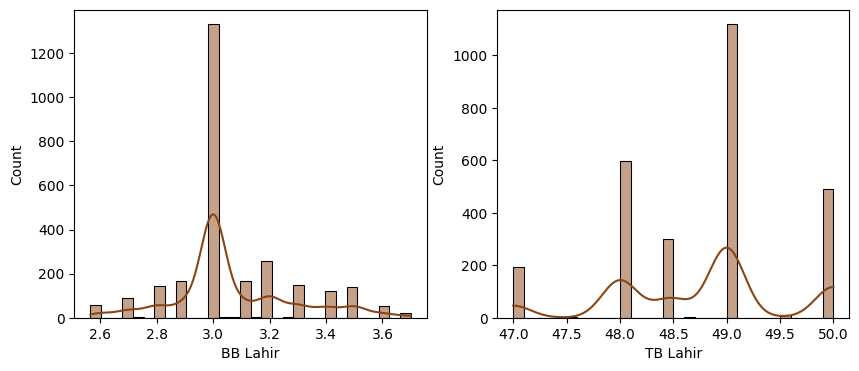

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data_clean["BB Lahir"], bins=30, kde=True, color="#8B4513", ax=axs[0])
sns.histplot(data_clean["TB Lahir"], bins=30, kde=True, color="#8B4513", ax=axs[1])

plt.show()

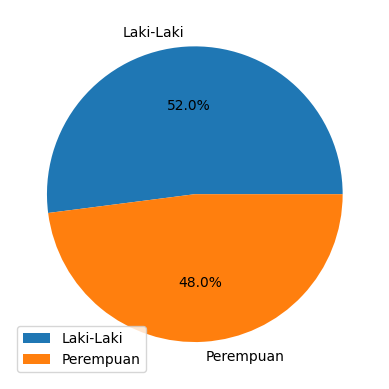

In [74]:
# Make a pie chart for see each category in data

fig, axs = plt.subplots()

axs.pie(data_clean["JK"].value_counts(), labels=["Laki-Laki", "Perempuan"], autopct = "%.1f%%")
#axs[1].pie(data_clean[""].value_counts(), labels=["Laki-Laki", "Perempuan"], autopct = "%.1f%%")


plt.legend()

plt.show()

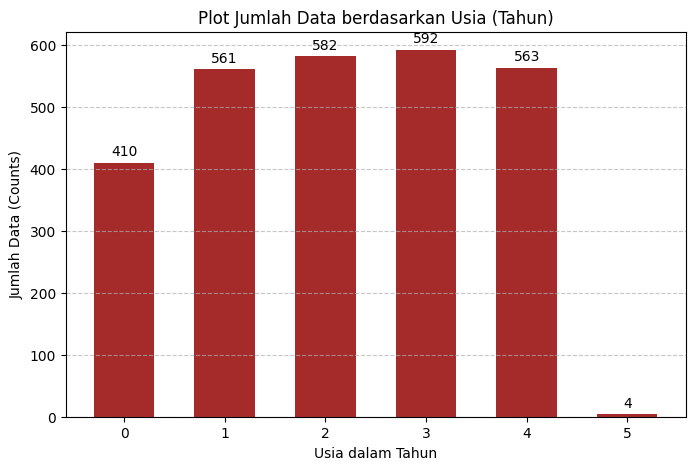

In [75]:
# Salin data
copy_data = data_clean.copy()

# Konversi usia ke tahun dengan pembulatan ke bilangan bulat (tanpa desimal)
copy_data["Usia dalam Tahun"] = copy_data["Usia dalam bulan"] // 12  # Dibulatkan ke bawah

# Hitung jumlah data per usia dalam tahun
usia_counts = copy_data["Usia dalam Tahun"].value_counts().sort_index()

# Buat bar plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(usia_counts.index, usia_counts.values, color="brown", width=0.6)

# Tambahkan label dan judul
plt.xlabel("Usia dalam Tahun")
plt.ylabel("Jumlah Data (Counts)")
plt.title("Plot Jumlah Data berdasarkan Usia (Tahun)")
#plt.xticks(np.arange(min(usia_counts.index), max(usia_counts.index) + 1, 1))  # Pastikan angka usia utuh
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.bar_label(bars, fmt='%d', padding=3, fontsize=10, color='black')
# Tampilkan plot
plt.show()

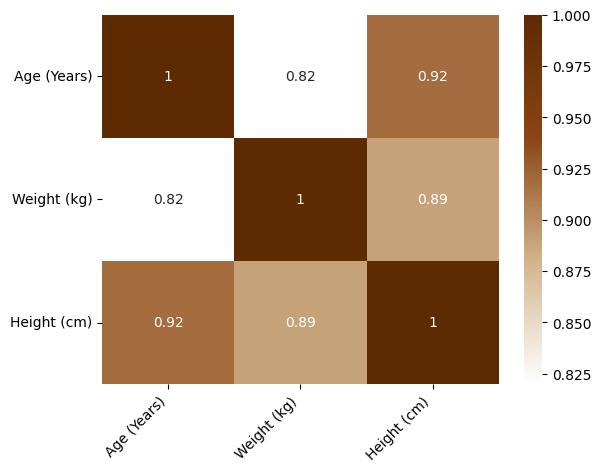

In [76]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt

data = copy_data[['Usia dalam Tahun','Berat', 'Tinggi']]
# Membuat dictionary untuk label kolom dalam bahasa Inggris
column_labels = {
    "Usia dalam Tahun": "Age (Years)",
    "Berat": "Weight (kg)",
    "Tinggi": "Height (cm)"
}

# Custom colormap dengan dark brown shades
# Custom colormap dengan white → light brown → brown → dark brown
brown_cmap = LinearSegmentedColormap.from_list(
    "brown_shades", ["#FFFFFF", "#D2B48C", "#8B4513", "#5D2A02"]
)

fig, ax = plt.subplots()
sns.heatmap(data.corr(), annot=True, cmap=brown_cmap)

# Mengubah label sumbu dengan label dalam bahasa Inggris
ax.set_xticklabels([column_labels[col] for col in data.columns], rotation=45, ha="right")
ax.set_yticklabels([column_labels[col] for col in data.columns], rotation=0)

# Save the figure as PNG
plt.savefig("Heatmap_of_Feature_Correlation.png", dpi=300, bbox_inches="tight")

plt.show()

# **Membangun model (SVM and Decision Tree)**

In [77]:
from sklearn.preprocessing import LabelEncoder

# Encode kolom JK dengan LabelEncoder
#label_encoder = LabelEncoder()

#List columns that needs to encode :
#1. BB/U
#2. TB/U
#3. BB/TB

# data_clean["Encode BB/U"] = label_encoder.fit_transform(data_clean["BB/U"])
# data_clean["Encode TB/U"] = label_encoder.fit_transform(data_clean["TB/U"])
# data_clean["Encode BB/TB"] = label_encoder.fit_transform(data_clean["BB/TB"])
# data_clean["Encode BB/TB"] = label_encoder.fit_transform(data_clean["BB/TB"])
# data_clean["Encode JK"] = label_encoder.fit_transform(data_clean["JK"])


# Mapping kategori ke angka
bb_u_mapping = {
    'Berat Badan Normal': 0,
    'Kurang': 1,
    'Sangat Kurang': 1,
    'Risiko Lebih': 2
}

tb_u_mapping = {
    'Normal': 0,
    'Pendek': 1,
    'Sangat Pendek': 1,
    'Tinggi': 2
}

bb_tb_mapping = {
    'Normal': 0,
    'Gizi Kurang': 1,
    'Beresiko Gizi Lebih': 2,
    'Outlier': 2,
    'Gizi Lebih': 2,
    'Gizi Buruk': 2,
    'Obesitas': 2
}

# Melakukan encoding dengan mapping
data_clean["Encode BB/U"] = data_clean["BB/U"].map(bb_u_mapping)
data_clean["Encode TB/U"] = data_clean["TB/U"].map(tb_u_mapping)
data_clean["Encode BB/TB"] = data_clean["BB/TB"].map(bb_tb_mapping)

# Jika 'JK' hanya memiliki 2 kategori (Laki-laki & Perempuan), bisa pakai map langsung:
jk_mapping = {'L': 0, 'P': 1}
data_clean["Encode JK"] = data_clean["JK"].map(jk_mapping)

# Jika ada kategori yang tidak masuk dalam mapping, bisa diisi dengan nilai default (misal: -1)
data_clean.fillna(-1, inplace=True)

In [78]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2712 entries, 0 to 3126
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JK                2712 non-null   object 
 1   Tahun Lahir       2712 non-null   int32  
 2   Bulan Lahir       2712 non-null   int32  
 3   Hari Lahir        2712 non-null   int32  
 4   BB Lahir          2712 non-null   float64
 5   TB Lahir          2712 non-null   float64
 6   Usia Saat Ukur    2712 non-null   object 
 7   Usia dalam bulan  2712 non-null   float64
 8   Tahun Pengukuran  2712 non-null   int32  
 9   Bulan Pengukuran  2712 non-null   int32  
 10  Hari Pengukuran   2712 non-null   int32  
 11  Berat             2712 non-null   float64
 12  Tinggi            2712 non-null   float64
 13  LiLA              2712 non-null   float64
 14  BB/U              2712 non-null   object 
 15  TB/U              2712 non-null   object 
 16  BB/TB             2712 non-null   object 
 17  

In [79]:
# Menghitung jumlah kategori
bb_u_counts = data_clean["Encode BB/U"].value_counts().sort_index()
tb_u_counts = data_clean["Encode TB/U"].value_counts().sort_index()
bb_tb_counts = data_clean["Encode BB/TB"].value_counts().sort_index()

# Pemetaan kode ke kategori asli yang benar
category_labels_bb_u = {0: 'Berat Badan Normal', 1: 'Kurang', 2: 'Risiko Lebih', 3: 'Sangat Kurang'}
category_labels_tb_u = {0: 'Normal', 1: 'Pendek', 2: 'Sangat Pendek', 3: 'Tinggi'}
category_labels_bb_tb = {0: 'Beresiko Gizi Lebih', 1: 'Gizi Buruk', 2: 'Gizi Kurang',
                         3: 'Gizi Lebih', 4: 'Normal', 5: 'Obesitas', 6: 'Outlier'}

In [80]:
print("Distribusi BB/U:")
print(data_clean['BB/U'].value_counts())
print()

print("Distribusi TB/U:")
print(data_clean['TB/U'].value_counts())
print()

print("Distribusi BB/TB:")
print(data_clean['BB/TB'].value_counts())
print()

Distribusi BB/U:
BB/U
Berat Badan Normal    2393
Kurang                 283
Sangat Kurang           35
Risiko Lebih             1
Name: count, dtype: int64

Distribusi TB/U:
TB/U
Normal           2306
Pendek            322
Sangat Pendek      80
Tinggi              4
Name: count, dtype: int64

Distribusi BB/TB:
BB/TB
Normal                 2426
Beresiko Gizi Lebih     139
Gizi Kurang             124
Gizi Lebih                9
Outlier                   7
Gizi Buruk                6
Obesitas                  1
Name: count, dtype: int64



In [81]:
data_clean[["Encode JK","BB/U", "TB/U", "BB/TB", "Encode BB/U", "Encode TB/U", "Encode BB/TB"]].value_counts()

# Unique values in BB/U: ['Berat Badan Normal : 0 ' 'Kurang : 1' 'Sangat Kurang : 3 ' 'Risiko Lebih : 2 ']
# Unique values in TB/U: ['Normal : 0 ' 'Pendek' : 1  'Sangat Pendek' : 2 'Tinggi : 3']
# Unique values in BB/TB: ['Normal : 4' 'Gizi Kurang : 2' 'Beresiko Gizi Lebih : 0' 'Outlier: 6' 'Gizi Lebih : 3 ''Gizi Buruk : 1 ' 'Obesitas : 5']

Encode JK  BB/U                TB/U           BB/TB                Encode BB/U  Encode TB/U  Encode BB/TB
0          Berat Badan Normal  Normal         Normal               0            0            0               1043
1          Berat Badan Normal  Normal         Normal               0            0            0                967
0          Berat Badan Normal  Pendek         Normal               0            1            0                 96
1          Berat Badan Normal  Pendek         Normal               0            1            0                 85
                               Normal         Beresiko Gizi Lebih  0            0            2                 67
0          Berat Badan Normal  Normal         Beresiko Gizi Lebih  0            0            2                 53
           Kurang              Pendek         Normal               1            1            0                 50
1          Kurang              Pendek         Normal               1            1            0                 44
                               Normal         Normal               1            0            0                 40
0          Kurang              Normal         Normal               1            0            0                 37
                                              Gizi Kurang          1            0            1                 28
                               Sangat Pendek  Normal               1            1            0                 27
1          Kurang              Normal         Gizi Kurang          1            0            1                 22
0          Berat Badan Normal  Normal         Gizi Kurang          0            0            1                 20
1          Berat Badan Normal  Normal         Gizi Kurang          0            0            1                 16
           Kurang              Sangat Pendek  Normal               1            1            0                 16
0          Kurang              Pendek         Gizi Kurang          1            1            1                 11
           Berat Badan Normal  Pendek         Beresiko Gizi Lebih  0            1            2                  9
           Sangat Kurang       Sangat Pendek  Gizi Kurang          1            1            1                  7
1          Sangat Kurang       Pendek         Gizi Kurang          1            1            1                  7
0          Berat Badan Normal  Sangat Pendek  Normal               0            1            0                  7
1          Kurang              Pendek         Gizi Kurang          1            1            1                  5
           Berat Badan Normal  Normal         Gizi Lebih           0            0            2                  5
                               Sangat Pendek  Normal               0            1            0                  4
0          Berat Badan Normal  Sangat Pendek  Beresiko Gizi Lebih  0            1            2                  4
1          Berat Badan Normal  Pendek         Beresiko Gizi Lebih  0            1            2                  4
0          Sangat Kurang       Pendek         Gizi Kurang          1            1            1                  4
           Berat Badan Normal  Normal         Gizi Lebih           0            0            2                  3
1          Sangat Kurang       Sangat Pendek  Gizi Kurang          1            1            1                  3
0          Sangat Kurang       Sangat Pendek  Gizi Buruk           1            1            2                  3
                                              Normal               1            1            0                  2
1          Sangat Kurang       Pendek         Normal               1            1            0                  2
                               Sangat Pendek  Normal               1            1            0                  2
           Berat Badan Normal  Tinggi         Normal               0            2            0                  2
                  

In [82]:
data_clean.drop(["JK", "Usia Saat Ukur", "BB/U","TB/U","BB/TB"], axis=1, inplace=True)
data_clean.head()

,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia dalam bulan,Tahun Pengukuran,Bulan Pengukuran,Hari Pengukuran,Berat,Tinggi,LiLA,Encode BB/U,Encode TB/U,Encode BB/TB,Encode JK
0,2019,11,9,2.8,49.0,58.1,2024,9,13,18.2,113.0,14.000000,0,0,0,0
1,2019,9,17,2.9,49.0,59.8,2024,9,10,17.8,107.0,15.069156,0,0,0,0
2,2019,10,23,3.0,49.0,58.4,2024,9,4,15.3,103.0,14.000000,0,0,0,1
3,2019,9,9,3.4,49.0,59.9,2024,9,4,17.1,102.5,14.000000,0,0,0,1
4,2019,9,13,3.0,48.0,59.7,2024,9,3,14.1,108.2,16.000000,0,0,1,0


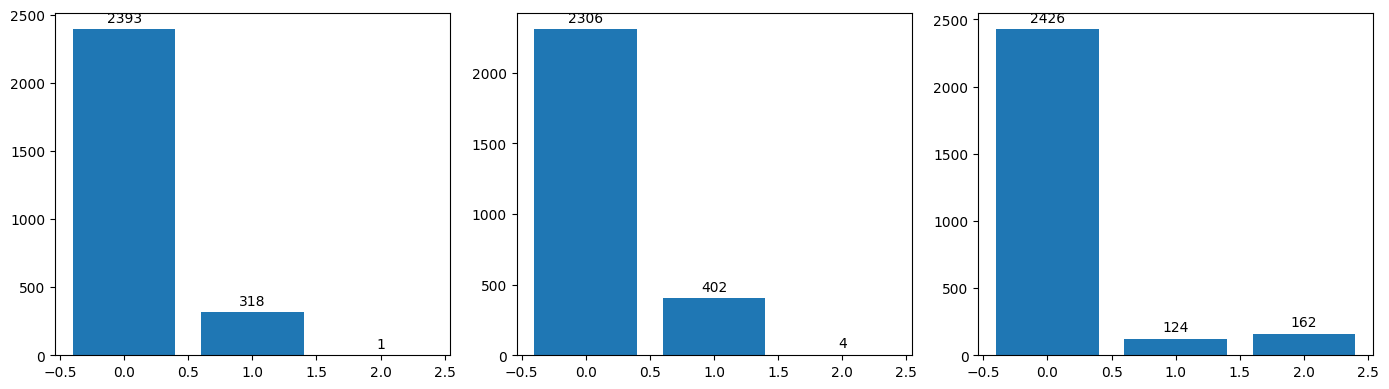

In [83]:
data = data_clean[["Encode BB/U", "Encode TB/U", "Encode BB/TB"]]
data_bbu = data["Encode BB/U"].value_counts().sort_index()
data_tbu = data["Encode TB/U"].value_counts().sort_index()
data_bbtb = data["Encode BB/TB"].value_counts().sort_index()

data_bbu.index
fig, ax = plt.subplots(1,3, figsize=(14,4))

bars_BBu = ax[0].bar(data_bbu.index, data_bbu.values)
ax[0].bar_label(bars_BBu, fmt='%d', padding=3, fontsize=10, color='black')

bars_BBu = ax[1].bar(data_tbu.index, data_tbu.values)
ax[1].bar_label(bars_BBu, fmt='%d', padding=3, fontsize=10, color='black')

bars_BBu = ax[2].bar(data_bbtb.index, data_bbtb.values)
ax[2].bar_label(bars_BBu, fmt='%d', padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [84]:
filter_data = data_clean[(data_clean["Encode BB/U"] == 2) | (data_clean["Encode TB/U"] == 2)].index
data_clean.drop(filter_data, inplace=True)
data_clean.head()

,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia dalam bulan,Tahun Pengukuran,Bulan Pengukuran,Hari Pengukuran,Berat,Tinggi,LiLA,Encode BB/U,Encode TB/U,Encode BB/TB,Encode JK
0,2019,11,9,2.8,49.0,58.1,2024,9,13,18.2,113.0,14.000000,0,0,0,0
1,2019,9,17,2.9,49.0,59.8,2024,9,10,17.8,107.0,15.069156,0,0,0,0
2,2019,10,23,3.0,49.0,58.4,2024,9,4,15.3,103.0,14.000000,0,0,0,1
3,2019,9,9,3.4,49.0,59.9,2024,9,4,17.1,102.5,14.000000,0,0,0,1
4,2019,9,13,3.0,48.0,59.7,2024,9,3,14.1,108.2,16.000000,0,0,1,0


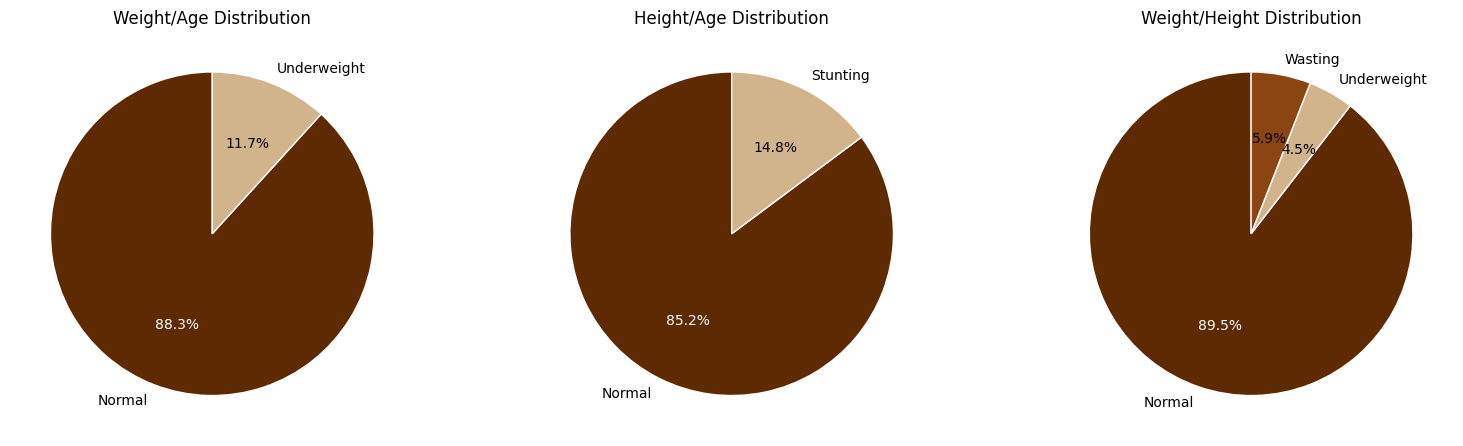

In [85]:
import matplotlib.pyplot as plt

# Data kategori
data = data_clean[["Encode BB/U", "Encode TB/U", "Encode BB/TB"]]
data_bbu = data["Encode BB/U"].value_counts().sort_index()
data_tbu = data["Encode TB/U"].value_counts().sort_index()
data_bbtb = data["Encode BB/TB"].value_counts().sort_index()

# Definisi label kategori
labels_bbu = ["Normal", "Underweight"]
labels_tbu = ["Normal", "Stunting"]
labels_bbtb = ["Normal", "Underweight", "Wasting"]

colors = ["#5D2A02", "#D2B48C", "#8B4513"]  # Warna untuk pie chart

# Fungsi untuk mengatur warna font berdasarkan label
def custom_autopct(pct, labels):
    def func(pct):
        label = labels[int(pct / 100 * len(labels))]  # Mendapatkan label berdasarkan indeks
        color = "white" if label == "Normal" else "black"
        return f'{pct:.1f}%' if pct > 0 else ''
    return func

# Membuat figure dan axes
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

# Plot pie chart untuk BB/U
wedges, texts, autotexts = ax[0].pie(data_bbu, labels=labels_bbu, autopct=custom_autopct(100, labels_bbu),
                                     colors=colors[:2], startangle=90, wedgeprops={'edgecolor': 'white'})
for i, text in enumerate(autotexts):
    if labels_bbu[i] == "Normal":
        text.set_color("white")

ax[0].set_title("Weight/Age Distribution")

# Plot pie chart untuk TB/U
wedges, texts, autotexts = ax[1].pie(data_tbu, labels=labels_tbu, autopct=custom_autopct(100, labels_tbu),
                                     colors=colors[:2], startangle=90, wedgeprops={'edgecolor': 'white'})
for i, text in enumerate(autotexts):
    if labels_tbu[i] == "Normal":
        text.set_color("white")

ax[1].set_title("Height/Age Distribution")

# Plot pie chart untuk BB/TB
wedges, texts, autotexts = ax[2].pie(data_bbtb, labels=labels_bbtb, autopct=custom_autopct(100, labels_bbtb),
                                     colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})
for i, text in enumerate(autotexts):
    if labels_bbtb[i] == "Normal":
        text.set_color("white")

ax[2].set_title("Weight/Height Distribution")

plt.tight_layout(pad=3)
plt.show()

In [86]:
usia_tahun = data_clean["Usia dalam bulan"] // 12
if "Usia (Tahun)" not in data_clean.columns:
  data_clean.insert(6, "Usia (Tahun)", usia_tahun)
filter = data_clean["Usia (Tahun)"] <= 0
data_clean.loc[filter].value_counts()

Tahun Lahir  Bulan Lahir  Hari Lahir  BB Lahir  TB Lahir   Usia dalam bulan  Usia (Tahun)  Tahun Pengukuran  Bulan Pengukuran  Hari Pengukuran  Berat  Tinggi  LiLA  Encode BB/U  Encode TB/U  Encode BB/TB  Encode JK
2024         9            23          3.3       48.480085  0.0               0.0           2024              9                 23               3.30   51.0    14.0  0            0            0             0            1
2023         9            9           2.8       48.000000  11.9              0.0           2024              9                 4                10.00  76.5    14.0  0            0            0             1            1
                          12          3.0       48.000000  11.8              0.0           2024              9                 5                8.40   71.5    15.0  0            0            0             1            1
                          13          3.2       49.000000  11.9              0.0           2024              9                 10               6.90   69.7    14.0  1            0            0             1            1
                          14          3.3       50.000000  11.7              0.0           2024              9                 5                8.09   74.0    15.0  0            0            0             1            1
                                                                                                                                                                                                                         ..
                          21          2.7       47.000000  11.4              0.0           2024              9                 2                7.80   69.0    12.0  0            1            0             0            1
                          18          3.0       49.000000  11.9              0.0           2024              9                 13               9.00   68.7    15.0  0            0            2             1            1
                                                48.000000  11.6              0.0           2024              9                 4                9.00   71.5    14.0  0            0            0             0            1
                                      2.9       48.480085  11.7              0.0           2024              9                 9                8.30   71.7    15.0  0            0            0             0            1
                          17          3.4       49.000000  11.8              0.0           2024              9                 10               7.80   70.5    14.5  0            0            0             1            1
Name: count, Length: 408, dtype: int64

In [87]:
data_clean = data_clean.drop(columns=['Tahun Pengukuran', 'Bulan Pengukuran'])

In [88]:
# Misalkan 'BB/U', 'TB/U', dan 'BB/TB' adalah kolom target
X = data_clean.drop(['Encode BB/U', 'Encode TB/U', 'Encode BB/TB'], axis=1)  # Mengambil semua kolom selain target
y = data_clean[['Encode BB/U']]  # Kolom target

# Membagi data menjadi 80% untuk training dan 20% untuk testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Menampilkan beberapa baris data training dan testing
print(X_train.head())
print()  # Spasi antar output
print(y_train.head())

      Tahun Lahir  Bulan Lahir  Hari Lahir  BB Lahir   TB Lahir  \
761          2021            9          14     3.000  48.000000   
1235         2022           10          10     3.575  48.480085   
746          2021           10           3     3.000  50.000000   
3004         2020            3          27     2.800  48.000000   
2558         2022            5          10     3.000  48.000000   

      Usia dalam bulan  Usia (Tahun)  Hari Pengukuran  Berat  Tinggi  LiLA  \
761               35.7           2.0                5   11.8    90.0  14.0   
1235              22.8           1.0                3   10.9    83.4  15.5   
746               35.3           2.0               13   12.6    88.3  16.0   
3004              53.2           4.0                2   12.7    99.7  14.0   
2558              28.1           2.0               13    9.6    79.5  14.0   

      Encode JK  
761           0  
1235          0  
746           0  
3004          0  
2558          0  

      Encode BB/U
7

# **SVM**


Classification Report for Weight/Age:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       479
           1       0.72      0.67      0.69        63

    accuracy                           0.93       542
   macro avg       0.84      0.82      0.83       542
weighted avg       0.93      0.93      0.93       542

Accuracy: 93.17%
Precision: 92.96%
Recall: 93.17%
F1-Score: 93.05%


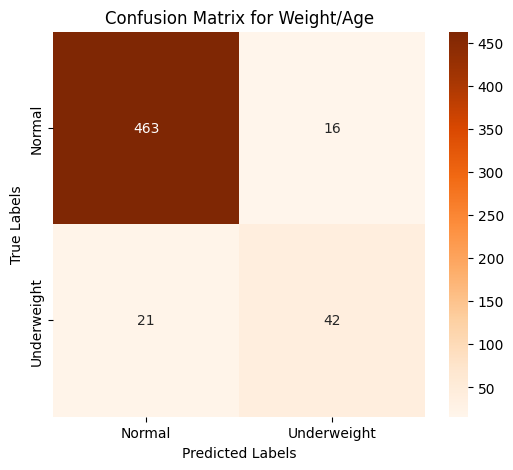


Classification Report for Height/Age:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       472
           1       0.72      0.74      0.73        70

    accuracy                           0.93       542
   macro avg       0.84      0.85      0.85       542
weighted avg       0.93      0.93      0.93       542

Accuracy: 92.99%
Precision: 93.08%
Recall: 92.99%
F1-Score: 93.03%


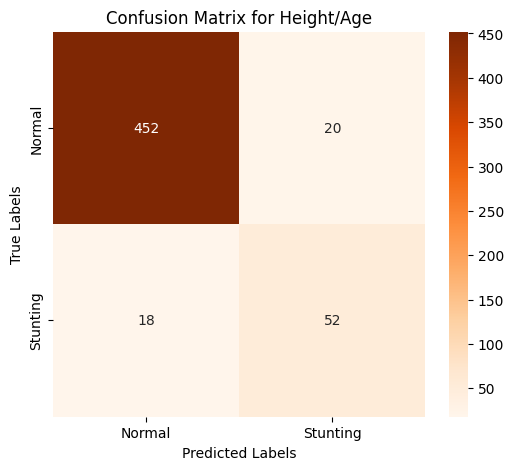


Classification Report for Weight/Height:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       484
           1       0.54      0.68      0.60        19
           2       0.61      0.51      0.56        39

    accuracy                           0.91       542
   macro avg       0.70      0.72      0.70       542
weighted avg       0.91      0.91      0.91       542

Accuracy: 91.14%
Precision: 91.14%
Recall: 91.14%
F1-Score: 91.08%


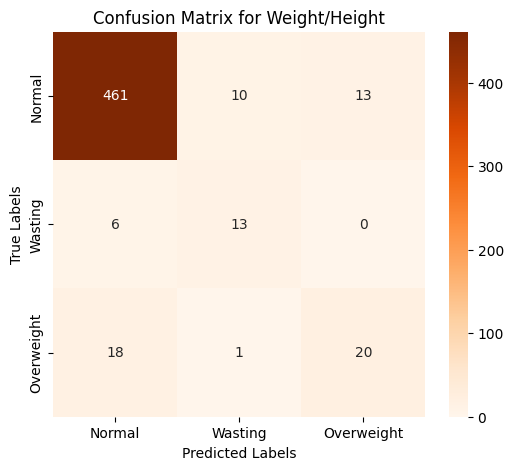

Semua confusion matrix disimpan di folder: output
F1-score testing untuk Weight/Height (C=5): 0.9108
F1-score training untuk Weight/Height: (C=10) 0.9646


In [89]:
from sklearn.compose import make_column_selector
from imblearn.pipeline import Pipeline

# Misalkan 'BB/U', 'TB/U', dan 'BB/TB' adalah kolom target
X = data_clean.drop(['Encode BB/U', 'Encode TB/U', 'Encode BB/TB'], axis=1)  # Fitur
y = data_clean[['Encode BB/U', 'Encode TB/U', 'Encode BB/TB']]  # Target

# Split data menjadi training (80%) dan testing (20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline untuk preprocessing dan model SVM dengan RandomOverSampler
pipeline = Pipeline([
    ('oversampling', RandomOverSampler(random_state=42)),  # ROS langsung di dalam pipeline
    ('preprocessing', ColumnTransformer([
        ('imputer', SimpleImputer(strategy='mean'), X.columns),
        ('log', FunctionTransformer(np.log1p, validate=True), X.columns)
    ], remainder='passthrough', verbose_feature_names_out=False)),
    ('scaler', StandardScaler()),
    ('svc', SVC(C=3, kernel='rbf', gamma='scale', random_state=42))  # Tuning C dan gamma
])


# MultiOutputClassifier untuk menangani multi-target classification
model = MultiOutputClassifier(pipeline)

# Melatih model dengan data training
model.fit(X_train1, y_train1)

# Prediksi pada data uji
predictions = np.column_stack(model.predict(X_test1)).T

# Definisi label kategori untuk setiap target
labels_dict = {
    "Encode BB/U": ["Normal", "Underweight"],
    "Encode TB/U": ["Normal", "Stunting"],
    "Encode BB/TB": ["Normal", "Wasting", "Overweight"]
}

titles_dict = {
    "Encode BB/U": "Weight/Age",
    "Encode TB/U": "Height/Age",
    "Encode BB/TB": "Weight/Height"
}

output_dir = "output"
os.makedirs(output_dir, exist_ok=True)  # Buat folder jika belum ada

# Evaluasi model untuk setiap target
for i, target in enumerate(y.columns):
    print(f"\nClassification Report for {titles_dict[target]}:")
    print(classification_report(y_test1[target], predictions[:, i], zero_division=1))

    acc = accuracy_score(y_test1[target], predictions[:, i])
    prec = precision_score(y_test1[target], predictions[:, i], average='weighted', zero_division=1)
    rec = recall_score(y_test1[target], predictions[:, i], average='weighted')
    f1 = f1_score(y_test1[target], predictions[:, i], average='weighted')

    print(f"Accuracy: {acc:.2%}")
    print(f"Precision: {prec:.2%}")
    print(f"Recall: {rec:.2%}")
    print(f"F1-Score: {f1:.2%}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test1[target], predictions[:, i])

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=labels_dict[target], yticklabels=labels_dict[target])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {titles_dict[target]}")

    # Simpan gambar dengan nama file yang valid
    safe_target = target.replace(" ", "_").replace("/", "_")  # Ganti karakter yang tidak valid
    save_path = os.path.join(output_dir, f"confusion_matrix_{safe_target}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

print(f"Semua confusion matrix disimpan di folder: {output_dir}")

c = 5
print(f"F1-score testing untuk {titles_dict[target]} (C={c}): {f1:.4f}")

train_predictions = np.column_stack(model.predict(X_train1)).T
train_f1 = f1_score(y_train1["Encode BB/TB"], train_predictions[:, 2], average='weighted')
print(f"F1-score training untuk Weight/Height: (C=10) {train_f1:.4f}")

# **DECISION TREE**

Shape of y_test1: (542, 3)
Shape of predictions: (542, 3)

Classification Report for Encode BB/U:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       479
           1       0.34      0.83      0.48        63

    accuracy                           0.80       542
   macro avg       0.66      0.81      0.68       542
weighted avg       0.90      0.80      0.83       542

Accuracy: 79.52%
Precision: 89.86%
Recall: 79.52%
F1-Score: 82.71%


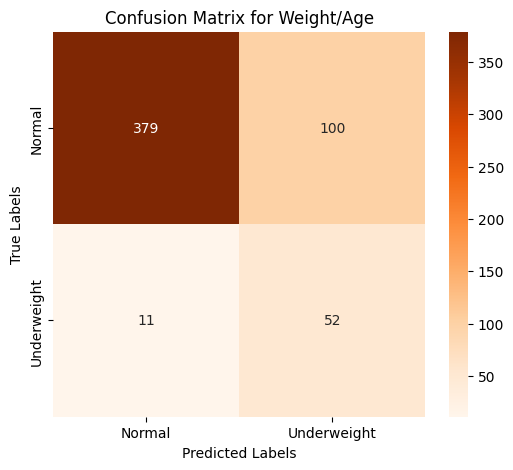


Classification Report for Encode TB/U:
              precision    recall  f1-score   support

           0       0.98      0.58      0.73       472
           1       0.25      0.93      0.39        70

    accuracy                           0.62       542
   macro avg       0.61      0.75      0.56       542
weighted avg       0.89      0.62      0.68       542

Accuracy: 62.36%
Precision: 88.70%
Recall: 62.36%
F1-Score: 68.42%


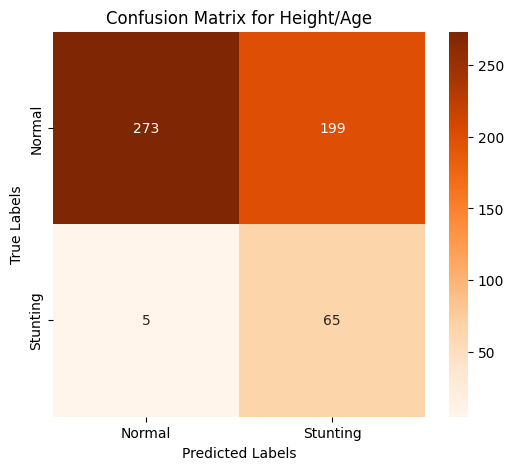


Classification Report for Encode BB/TB:
              precision    recall  f1-score   support

           0       0.95      0.65      0.77       484
           1       0.09      0.47      0.15        19
           2       0.26      0.74      0.39        39

    accuracy                           0.65       542
   macro avg       0.43      0.62      0.44       542
weighted avg       0.87      0.65      0.72       542

Accuracy: 65.31%
Precision: 86.71%
Recall: 65.31%
F1-Score: 72.33%


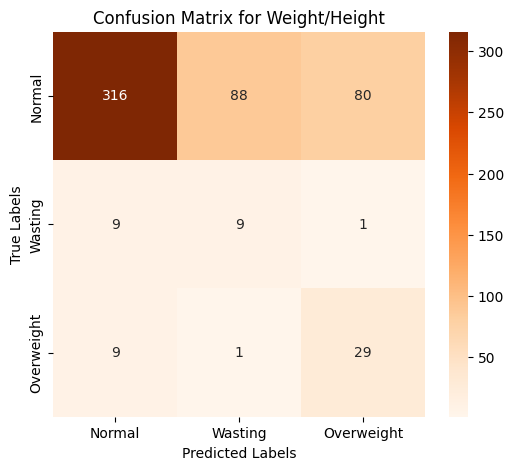

Semua confusion matrix disimpan di folder: output
F1-score untuk Weight/Height (C=5): 0.7233
F1-score training untuk Weight/Height: (C=10) 0.7311


In [90]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

# Definisi fitur & target
X = data_clean.drop(['Encode BB/U', 'Encode TB/U', 'Encode BB/TB'], axis=1)  # Fitur
y = data_clean[['Encode BB/U', 'Encode TB/U', 'Encode BB/TB']]  # Target

# Split data menjadi training (80%) dan testing (20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline untuk preprocessing + model Decision Tree (dengan Gini)
pipeline = Pipeline([
    ('oversampling', RandomOverSampler(random_state=42)),  # Menangani imbalance data
    ('preprocessing', ColumnTransformer([
        ('imputer', SimpleImputer(strategy='mean'), X.columns),  # Mengisi nilai kosong
        ('log', FunctionTransformer(np.log1p, validate=True), X.columns)  # Transformasi log
    ], remainder='passthrough', verbose_feature_names_out=False)),
    ('scaler', StandardScaler()),  # Standarisasi data
    ('dt', DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42))  # Model Decision Tree
])

# MultiOutputClassifier untuk multi-label classification
model = MultiOutputClassifier(pipeline)

# Training model
model.fit(X_train1, y_train1)

# Prediksi pada data uji
predictions_dt = np.column_stack(model.predict(X_test1)).T

# Cek jumlah sampel sebelum evaluasi
print(f"Shape of y_test1: {y_test1.shape}")
print(f"Shape of predictions: {predictions_dt.shape}")

# Definisi label kategori untuk setiap target
labels_dict = {
    "Encode BB/U": ["Normal", "Underweight"],
    "Encode TB/U": ["Normal", "Stunting"],
    "Encode BB/TB": ["Normal", "Wasting", "Overweight"]
}

titles_dict = {
    "Encode BB/U": "Weight/Age",
    "Encode TB/U": "Height/Age",
    "Encode BB/TB": "Weight/Height"
}

output_dir = "output"
os.makedirs(output_dir, exist_ok=True)  # Buat folder jika belum ada

# Evaluasi Model dengan Confusion Matrix
for i, target in enumerate(y.columns):
    print(f"\nClassification Report for {target}:")
    print(classification_report(y_test1[target], predictions_dt[:, i], zero_division=1))

    acc = accuracy_score(y_test1[target], predictions_dt[:, i])
    prec = precision_score(y_test1[target], predictions_dt[:, i], average='weighted', zero_division=1)
    rec = recall_score(y_test1[target], predictions_dt[:, i], average='weighted')
    f1 = f1_score(y_test1[target], predictions_dt[:, i], average='weighted')

    print(f"Accuracy: {acc:.2%}")
    print(f"Precision: {prec:.2%}")
    print(f"Recall: {rec:.2%}")
    print(f"F1-Score: {f1:.2%}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test1[target], predictions_dt[:, i])

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=labels_dict[target], yticklabels=labels_dict[target])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {titles_dict[target]}")  # Ganti title dengan yang lebih deskriptif

    # Simpan gambar dengan nama file yang valid
    safe_target = target.replace(" ", "_").replace("/", "_")  # Ganti karakter yang tidak valid
    save_path = os.path.join(output_dir, f"confusion_matrix_{safe_target}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()

print(f"Semua confusion matrix disimpan di folder: {output_dir}")

print(f"F1-score untuk {titles_dict[target]} (C={c}): {f1:.4f}")

train_predictions = np.column_stack(model.predict(X_train1)).T
train_f1 = f1_score(y_train1["Encode BB/TB"], train_predictions[:, 2], average='weighted')
print(f"F1-score training untuk Weight/Height: (C=10) {train_f1:.4f}")

# Result perbandingan

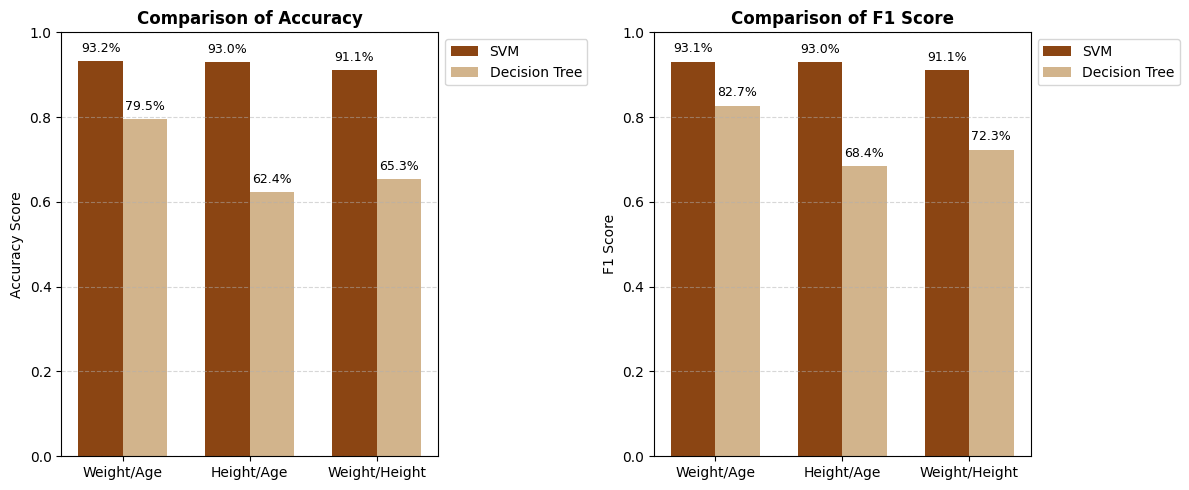

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Nama kategori target
targets = ["Encoded BB/U", "Encoded TB/U", "Encoded BB/TB"]
custom_labels = ["Weight/Age", "Height/Age", "Weight/Height"]

# Simpan metrik dari kedua model
accuracy_svm, f1_svm = [], []
accuracy_dt, f1_dt = [], []  # Decision Tree

for i, target in enumerate(y.columns):
    # SVM Metrics
    acc_svm = accuracy_score(y_test1[target], predictions[:, i])
    f1_svm_val = f1_score(y_test1[target], predictions[:, i], average='weighted')
    accuracy_svm.append(acc_svm)
    f1_svm.append(f1_svm_val)

    # Decision Tree Metrics
    acc_dt = accuracy_score(y_test1[target], predictions_dt[:, i])
    f1_dt_val = f1_score(y_test1[target], predictions_dt[:, i], average='weighted')
    accuracy_dt.append(acc_dt)
    f1_dt.append(f1_dt_val)

# Konversi ke numpy array
accuracy_svm = np.array(accuracy_svm)
f1_svm = np.array(f1_svm)
accuracy_dt = np.array(accuracy_dt)
f1_dt = np.array(f1_dt)

# Lebar bar dalam bar chart
bar_width = 0.35
index = np.arange(len(targets))

# Membuat figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot untuk Accuracy
bars1 = ax[0].bar(index - bar_width/2, accuracy_svm, bar_width, label="SVM", color="#8B4513")
bars2 = ax[0].bar(index + bar_width/2, accuracy_dt, bar_width, label="Decision Tree", color="#D2B48C")

ax[0].set_xticks(index)
ax[0].set_xticklabels(custom_labels, fontsize=10)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel("Accuracy Score", fontsize=10)
ax[0].set_title("Comparison of Accuracy", fontsize=12, fontweight="bold")
ax[0].grid(axis="y", linestyle="--", alpha=0.5)

# Bar plot untuk F1 Score
bars3 = ax[1].bar(index - bar_width/2, f1_svm, bar_width, label="SVM", color="#8B4513")
bars4 = ax[1].bar(index + bar_width/2, f1_dt, bar_width, label="Decision Tree", color="#D2B48C")

ax[1].set_xticks(index)
ax[1].set_xticklabels(custom_labels, fontsize=10)
ax[1].set_ylim(0, 1)
ax[1].set_ylabel("F1 Score", fontsize=10)
ax[1].set_title("Comparison of F1 Score", fontsize=12, fontweight="bold")
ax[1].grid(axis="y", linestyle="--", alpha=0.5)

# Menambahkan teks persen di atas bar
def add_percentage(bars, ax_index):
    for bar in bars:
        height = bar.get_height()
        ax[ax_index].text(
            bar.get_x() + bar.get_width()/2, height + 0.015, f'{height*100:.1f}%',
            ha='center', va='bottom', fontsize=9, color='black'
        )

add_percentage(bars1, 0)
add_percentage(bars2, 0)
add_percentage(bars3, 1)
add_percentage(bars4, 1)

# Pindahin legend ke samping kanan
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Menyesuaikan layout
plt.tight_layout()

# Save the figure as PNG
plt.savefig("comparison_of_accuracy.png", dpi=300, bbox_inches='tight')

plt.show()
